#Exploratory Data Analysis of the Colombian Power System

Units:

* precio_bolsa_tx1: **COP/kWh**
* generacion_total_programada_redespacho: **GWh**
* generacion_total_programada_despacho: **GWh**
* generacion_total_real: **GWh**
* importacion_programada_redespacho: **GWh**
* importacion__real: **GWh**
* exportacion_programada_redespacho: **GWh**
* exportacion__real: **GWh**
* disponibilidad_real: **MW**
* demanda_no_atendida: **MWh**
* costo_marginal_promedio_redespacho: **COP/kWh**
* aportes_hidricos: **GWh**
* volumen_util_diario: **GWh**
* volumen: **GWh**

## Introduction


The data collected with the scraper is continuously stored in a MySQL DataBase.

Because of that, we take the data from 2013.10.01 to 2021.01.04 to do the batch analysis, time series and ML. 

Therefore, the batch data is downloaded from the database to CSV files, and then charged to Pandas.

## Read data

In [53]:
import pandas as pd

In [54]:
operation_raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyectos/sistema electrico/data/operation_data.csv')
prices_raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyectos/sistema electrico/data/prices.csv')

## Operation-Data Cleaning

In the following lines of code is made the Data Wrangling for the operation data with the following steps:
1. Change ND string to 0
2. Put the correct data type 
3. Set 'date' as index
4. Drop database 'id' field
5. Check for nans
6. Put the data in new DataFrame named operation_data

In [55]:
operation_raw_data.head(5)

,date,generacion_total_programada_redespacho,generacion_total_programada_despacho,generacion_total_real,importacion_programada_redespacho,importacion__real,exportacion_programada_redespacho,exportacion__real,disponibilidad_real,demanda_no_atendida,costo_marginal_promedio_redespacho,aportes_hidricos,volumen_util_diario,volumen,id
0,'2013-10-01 00:00:00',178.25,ND,171.61,ND,ND,ND,ND,11835.32,305.11,147.44,142.77,9520.17,10658.53,1
1,'2013-10-02 00:00:00',180.02,ND,175.39,ND,ND,ND,ND,11800.91,167.89,160.8,134.89,9483.4,10621.76,2
2,'2013-10-03 00:00:00',177.47,ND,178.08,ND,ND,ND,ND,11867.83,762.85,177.83,156.98,9488.42,10626.78,3
3,'2013-10-04 00:00:00',176.78,ND,171.71,ND,ND,ND,ND,12187.11,14084.9,234.88,334.12,9674.33,10812.69,4
4,'2013-10-05 00:00:00',164.68,ND,163.28,ND,ND,ND,ND,12007.72,541.86,165.3,168.85,9726.04,10864.4,5


In [56]:
operation_raw_data.columns

Index(['date', 'generacion_total_programada_redespacho',
       'generacion_total_programada_despacho', 'generacion_total_real',
       'importacion_programada_redespacho', 'importacion__real',
       'exportacion_programada_redespacho', 'exportacion__real',
       'disponibilidad_real', 'demanda_no_atendida',
       'costo_marginal_promedio_redespacho', 'aportes_hidricos',
       'volumen_util_diario', 'volumen', 'id'],
      dtype='object')

In [57]:
operation_raw_data.dtypes

date                                      object
generacion_total_programada_redespacho    object
generacion_total_programada_despacho      object
generacion_total_real                     object
importacion_programada_redespacho         object
importacion__real                         object
exportacion_programada_redespacho         object
exportacion__real                         object
disponibilidad_real                       object
demanda_no_atendida                       object
costo_marginal_promedio_redespacho        object
aportes_hidricos                          object
volumen_util_diario                       object
volumen                                   object
id                                         int64
dtype: object

In [58]:
def changeND(dato):
  if (dato=='ND'):
    return 0
  else:
    return dato

In [59]:
operation_raw_data['generacion_total_programada_redespacho'] = operation_raw_data['generacion_total_programada_redespacho'].apply(changeND)
operation_raw_data['generacion_total_programada_despacho'] = operation_raw_data['generacion_total_programada_despacho'].apply(changeND)
operation_raw_data['generacion_total_real'] = operation_raw_data['generacion_total_real'].apply(changeND)
operation_raw_data['exportacion_programada_redespacho'] = operation_raw_data['exportacion_programada_redespacho'].apply(changeND)
operation_raw_data['exportacion__real'] = operation_raw_data['exportacion__real'].apply(changeND)
operation_raw_data['disponibilidad_real'] = operation_raw_data['disponibilidad_real'].apply(changeND)
operation_raw_data['demanda_no_atendida'] = operation_raw_data['demanda_no_atendida'].apply(changeND)
operation_raw_data['costo_marginal_promedio_redespacho'] = operation_raw_data['costo_marginal_promedio_redespacho'].apply(changeND)
operation_raw_data['aportes_hidricos'] = operation_raw_data['aportes_hidricos'].apply(changeND)
operation_raw_data['volumen_util_diario'] = operation_raw_data['volumen_util_diario'].apply(changeND)
operation_raw_data['volumen'] = operation_raw_data['volumen'].apply(changeND)
operation_raw_data['importacion_programada_redespacho'] = operation_raw_data['importacion_programada_redespacho'].apply(changeND)
operation_raw_data['importacion__real'] = operation_raw_data['importacion__real'].apply(changeND)

In [60]:
operation_raw_data.head(5)

,date,generacion_total_programada_redespacho,generacion_total_programada_despacho,generacion_total_real,importacion_programada_redespacho,importacion__real,exportacion_programada_redespacho,exportacion__real,disponibilidad_real,demanda_no_atendida,costo_marginal_promedio_redespacho,aportes_hidricos,volumen_util_diario,volumen,id
0,'2013-10-01 00:00:00',178.25,0,171.61,0,0,0,0,11835.32,305.11,147.44,142.77,9520.17,10658.53,1
1,'2013-10-02 00:00:00',180.02,0,175.39,0,0,0,0,11800.91,167.89,160.8,134.89,9483.4,10621.76,2
2,'2013-10-03 00:00:00',177.47,0,178.08,0,0,0,0,11867.83,762.85,177.83,156.98,9488.42,10626.78,3
3,'2013-10-04 00:00:00',176.78,0,171.71,0,0,0,0,12187.11,14084.9,234.88,334.12,9674.33,10812.69,4
4,'2013-10-05 00:00:00',164.68,0,163.28,0,0,0,0,12007.72,541.86,165.3,168.85,9726.04,10864.4,5


In [61]:
operation_raw_data['generacion_total_programada_redespacho'] = pd.to_numeric(operation_raw_data['generacion_total_programada_redespacho'])
operation_raw_data['generacion_total_programada_despacho'] = pd.to_numeric(operation_raw_data['generacion_total_programada_despacho'])
operation_raw_data['generacion_total_real'] = pd.to_numeric(operation_raw_data['generacion_total_real'])
operation_raw_data['exportacion_programada_redespacho'] = pd.to_numeric(operation_raw_data['exportacion_programada_redespacho'])
operation_raw_data['exportacion__real'] = pd.to_numeric(operation_raw_data['exportacion__real'])
operation_raw_data['disponibilidad_real'] = pd.to_numeric(operation_raw_data['disponibilidad_real'])
operation_raw_data['demanda_no_atendida'] = pd.to_numeric(operation_raw_data['demanda_no_atendida'])
operation_raw_data['costo_marginal_promedio_redespacho'] = pd.to_numeric(operation_raw_data['costo_marginal_promedio_redespacho'])
operation_raw_data['aportes_hidricos'] = pd.to_numeric(operation_raw_data['aportes_hidricos'])
operation_raw_data['volumen_util_diario'] = pd.to_numeric(operation_raw_data['volumen_util_diario'])
operation_raw_data['volumen'] = pd.to_numeric(operation_raw_data['volumen'])
operation_raw_data['importacion_programada_redespacho'] = pd.to_numeric(operation_raw_data['importacion_programada_redespacho'])
operation_raw_data['importacion__real'] = pd.to_numeric(operation_raw_data['importacion__real'])
operation_raw_data['date'] = pd.to_datetime(operation_raw_data['date'])

In [62]:
operation_raw_data.dtypes

date                                      datetime64[ns]
generacion_total_programada_redespacho           float64
generacion_total_programada_despacho             float64
generacion_total_real                            float64
importacion_programada_redespacho                float64
importacion__real                                float64
exportacion_programada_redespacho                float64
exportacion__real                                float64
disponibilidad_real                              float64
demanda_no_atendida                              float64
costo_marginal_promedio_redespacho               float64
aportes_hidricos                                 float64
volumen_util_diario                              float64
volumen                                          float64
id                                                 int64
dtype: object

In [63]:
operation_raw_data['date'] = pd.to_datetime(operation_raw_data['date']).dt.date

In [64]:
operation_raw_data.head(5)

,date,generacion_total_programada_redespacho,generacion_total_programada_despacho,generacion_total_real,importacion_programada_redespacho,importacion__real,exportacion_programada_redespacho,exportacion__real,disponibilidad_real,demanda_no_atendida,costo_marginal_promedio_redespacho,aportes_hidricos,volumen_util_diario,volumen,id
0,2013-10-01,178.25,0.0,171.61,0.0,0.0,0.0,0.0,11835.32,305.11,147.44,142.77,9520.17,10658.53,1
1,2013-10-02,180.02,0.0,175.39,0.0,0.0,0.0,0.0,11800.91,167.89,160.80,134.89,9483.40,10621.76,2
2,2013-10-03,177.47,0.0,178.08,0.0,0.0,0.0,0.0,11867.83,762.85,177.83,156.98,9488.42,10626.78,3
3,2013-10-04,176.78,0.0,171.71,0.0,0.0,0.0,0.0,12187.11,14084.90,234.88,334.12,9674.33,10812.69,4
4,2013-10-05,164.68,0.0,163.28,0.0,0.0,0.0,0.0,12007.72,541.86,165.30,168.85,9726.04,10864.40,5


In [65]:
operation_raw_data.set_index('date', inplace=True)

In [66]:
operation_raw_data = operation_raw_data.drop('id', axis=1)

In [67]:
operation_raw_data.isna().sum()

generacion_total_programada_redespacho    0
generacion_total_programada_despacho      0
generacion_total_real                     0
importacion_programada_redespacho         0
importacion__real                         0
exportacion_programada_redespacho         0
exportacion__real                         0
disponibilidad_real                       0
demanda_no_atendida                       0
costo_marginal_promedio_redespacho        0
aportes_hidricos                          0
volumen_util_diario                       0
volumen                                   0
dtype: int64

In [68]:
operation_data = operation_raw_data

In [69]:
operation_data.info

<bound method DataFrame.info of             generacion_total_programada_redespacho  ...   volumen
date                                                ...          
2013-10-01                                  178.25  ...  10658.53
2013-10-02                                  180.02  ...  10621.76
2013-10-03                                  177.47  ...  10626.78
2013-10-04                                  176.78  ...  10812.69
2013-10-05                                  164.68  ...  10864.40
...                                            ...  ...       ...
2020-12-31                                  196.95  ...  13734.66
2021-01-01                                  181.62  ...  13718.87
2021-01-02                                  156.58  ...  13725.25
2021-01-03                                  176.79  ...  13715.58
2021-01-04                                  172.72  ...  13716.35

[2645 rows x 13 columns]>

In [70]:
operation_data

,generacion_total_programada_redespacho,generacion_total_programada_despacho,generacion_total_real,importacion_programada_redespacho,importacion__real,exportacion_programada_redespacho,exportacion__real,disponibilidad_real,demanda_no_atendida,costo_marginal_promedio_redespacho,aportes_hidricos,volumen_util_diario,volumen
date,,,,,,,,,,,,,
2013-10-01,178.25,0.00,171.61,0.0,0.00,0.0,0.00,11835.32,305.11,147.44,142.77,9520.17,10658.53
2013-10-02,180.02,0.00,175.39,0.0,0.00,0.0,0.00,11800.91,167.89,160.80,134.89,9483.40,10621.76
2013-10-03,177.47,0.00,178.08,0.0,0.00,0.0,0.00,11867.83,762.85,177.83,156.98,9488.42,10626.78
2013-10-04,176.78,0.00,171.71,0.0,0.00,0.0,0.00,12187.11,14084.90,234.88,334.12,9674.33,10812.69
2013-10-05,164.68,0.00,163.28,0.0,0.00,0.0,0.00,12007.72,541.86,165.30,168.85,9726.04,10864.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,196.95,197.18,187.79,0.0,0.09,0.0,0.05,14261.20,8.97,156.85,110.79,12181.19,13734.66
2021-01-01,181.62,181.56,171.14,0.0,0.11,0.0,0.06,14049.69,27.30,142.19,117.60,12165.38,13718.87
2021-01-02,156.58,156.28,150.16,0.0,0.09,0.0,0.05,13985.05,0.00,133.81,119.22,12171.76,13725.25


## Prices Data Cleaning

In the following lines of code is made the Data Wrangling for the prices data with the following steps:
1. Set date as index
2. Drop database 'id' field

In [71]:
prices_raw_data.head(5)

,id,date,precio_bolsa_tx1
0,1,2013-10-01 00:00:00,146.93
1,2,2013-10-02 00:00:00,147.73
2,3,2013-10-03 00:00:00,170.11
3,4,2013-10-04 00:00:00,155.70
4,5,2013-10-05 00:00:00,153.19


In [72]:
prices_raw_data.dtypes

id                    int64
date                 object
precio_bolsa_tx1    float64
dtype: object

In [73]:
prices_raw_data['date'] = pd.to_datetime(prices_raw_data['date']).dt.date
prices_raw_data = prices_raw_data.drop('id', axis=1)

In [74]:
prices_raw_data.head(5)

,date,precio_bolsa_tx1
0,2013-10-01,146.93
1,2013-10-02,147.73
2,2013-10-03,170.11
3,2013-10-04,155.70
4,2013-10-05,153.19


In [75]:
#prices_raw_data.set_index('date', inplace=True)

In [76]:
prices_raw_data.info

<bound method DataFrame.info of             date  precio_bolsa_tx1
0     2013-10-01            146.93
1     2013-10-02            147.73
2     2013-10-03            170.11
3     2013-10-04            155.70
4     2013-10-05            153.19
...          ...               ...
2606  2020-12-28            162.66
2607  2020-12-30            168.30
2608  2021-01-01            168.92
2609  2021-01-02            144.02
2610  2021-01-04            122.22

[2611 rows x 2 columns]>

In [77]:
prices_data = prices_raw_data

## Tables Join

In [78]:
power_system_data = pd.merge(prices_data, operation_data, on="date", how='outer')

In [79]:
power_system_data.head(5)

,date,precio_bolsa_tx1,generacion_total_programada_redespacho,generacion_total_programada_despacho,generacion_total_real,importacion_programada_redespacho,importacion__real,exportacion_programada_redespacho,exportacion__real,disponibilidad_real,demanda_no_atendida,costo_marginal_promedio_redespacho,aportes_hidricos,volumen_util_diario,volumen
0,2013-10-01,146.93,178.25,0.0,171.61,0.0,0.0,0.0,0.0,11835.32,305.11,147.44,142.77,9520.17,10658.53
1,2013-10-02,147.73,180.02,0.0,175.39,0.0,0.0,0.0,0.0,11800.91,167.89,160.80,134.89,9483.40,10621.76
2,2013-10-03,170.11,177.47,0.0,178.08,0.0,0.0,0.0,0.0,11867.83,762.85,177.83,156.98,9488.42,10626.78
3,2013-10-04,155.70,176.78,0.0,171.71,0.0,0.0,0.0,0.0,12187.11,14084.90,234.88,334.12,9674.33,10812.69
4,2013-10-05,153.19,164.68,0.0,163.28,0.0,0.0,0.0,0.0,12007.72,541.86,165.30,168.85,9726.04,10864.40


In [80]:
power_system_data.isna().sum()

date                                       0
precio_bolsa_tx1                          36
generacion_total_programada_redespacho     0
generacion_total_programada_despacho       0
generacion_total_real                      0
importacion_programada_redespacho          0
importacion__real                          0
exportacion_programada_redespacho          0
exportacion__real                          0
disponibilidad_real                        0
demanda_no_atendida                        0
costo_marginal_promedio_redespacho         0
aportes_hidricos                           0
volumen_util_diario                        0
volumen                                    0
dtype: int64

In [81]:
power_system_data = power_system_data.sort_values(by='date')

In [82]:
#power_system_data = power_system_data.replace(to_replace=0, method='ffill')
import numpy as np

power_system_data['costo_marginal_promedio_redespacho'] = power_system_data['costo_marginal_promedio_redespacho'].replace(to_replace=0, method='ffill')
power_system_data['aportes_hidricos'] = power_system_data['aportes_hidricos'].replace(to_replace=0, method='ffill')
power_system_data['generacion_total_programada_redespacho'] = power_system_data['generacion_total_programada_redespacho'].replace(to_replace=0, method='ffill')
power_system_data['generacion_total_real'] = power_system_data['generacion_total_real'].replace(to_replace=0, method='ffill')
power_system_data['volumen_util_diario'] = power_system_data['volumen_util_diario'].replace(to_replace=0, method='ffill')
power_system_data['disponibilidad_real'] = power_system_data['disponibilidad_real'].replace(to_replace=0, method='ffill')
power_system_data['volumen'] = power_system_data['volumen'].replace(to_replace=0, method='ffill')
power_system_data['precio_bolsa_tx1'] = power_system_data['precio_bolsa_tx1'].replace(to_replace=np.nan, method='ffill')



In [83]:
power_system_data['disponibilidad_real'] = power_system_data['disponibilidad_real'].apply(lambda x: x*24/1000)
power_system_data['demanda_no_atendida'] = power_system_data['demanda_no_atendida'].apply(lambda x: x/1000)

In [84]:
power_system_data.head(5)

,date,precio_bolsa_tx1,generacion_total_programada_redespacho,generacion_total_programada_despacho,generacion_total_real,importacion_programada_redespacho,importacion__real,exportacion_programada_redespacho,exportacion__real,disponibilidad_real,demanda_no_atendida,costo_marginal_promedio_redespacho,aportes_hidricos,volumen_util_diario,volumen
0,2013-10-01,146.93,178.25,0.0,171.61,0.0,0.0,0.0,0.0,284.04768,0.30511,147.44,142.77,9520.17,10658.53
1,2013-10-02,147.73,180.02,0.0,175.39,0.0,0.0,0.0,0.0,283.22184,0.16789,160.80,134.89,9483.40,10621.76
2,2013-10-03,170.11,177.47,0.0,178.08,0.0,0.0,0.0,0.0,284.82792,0.76285,177.83,156.98,9488.42,10626.78
3,2013-10-04,155.70,176.78,0.0,171.71,0.0,0.0,0.0,0.0,292.49064,14.08490,234.88,334.12,9674.33,10812.69
4,2013-10-05,153.19,164.68,0.0,163.28,0.0,0.0,0.0,0.0,288.18528,0.54186,165.30,168.85,9726.04,10864.40


## Graphs

In [85]:
import matplotlib.pyplot as plt

### Price

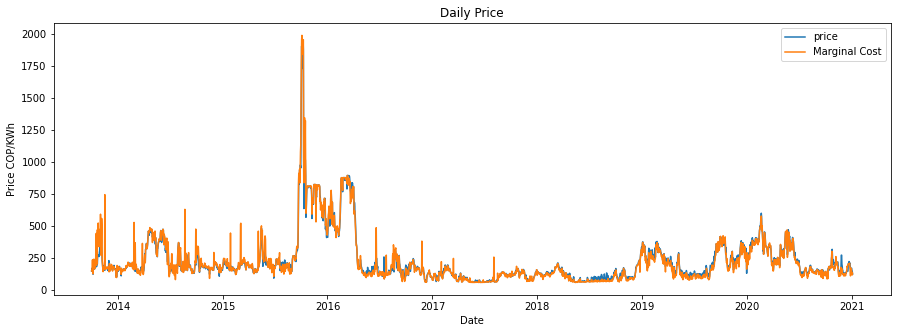

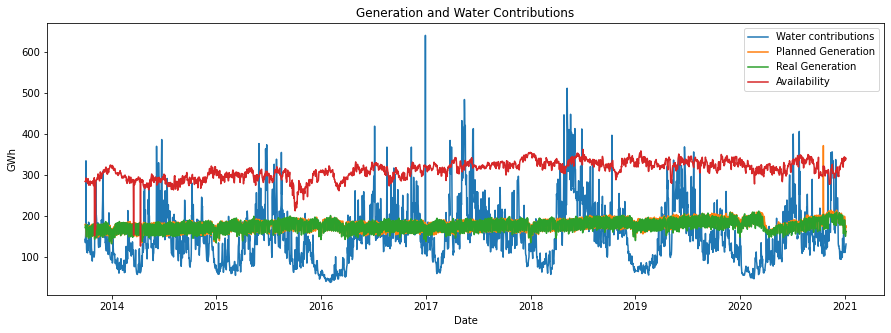

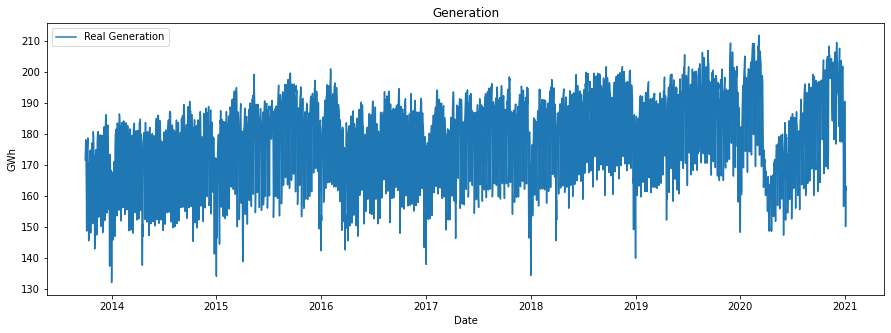

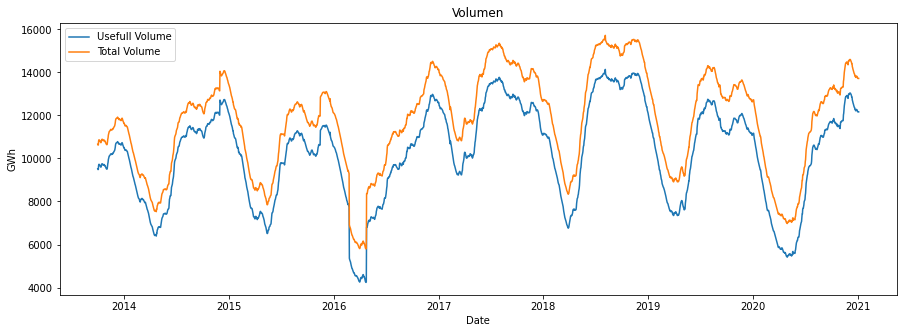

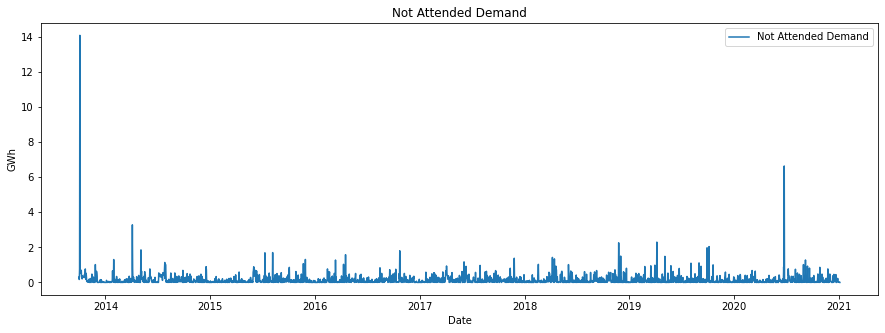

In [86]:
plt.figure(figsize=(15,5))
plt.title("Daily Price")
plt.plot(power_system_data['date'], power_system_data['precio_bolsa_tx1'], label='price')
plt.plot(power_system_data['date'], power_system_data['costo_marginal_promedio_redespacho'], label='Marginal Cost')
plt.xlabel('Date')
plt.ylabel('Price COP/KWh')
plt.legend()
plt.show()


plt.figure(figsize=(15,5))
plt.title("Generation and Water Contributions")
plt.plot(power_system_data['date'], power_system_data['aportes_hidricos'], label='Water contributions')
plt.plot(power_system_data['date'], power_system_data['generacion_total_programada_redespacho'], label='Planned Generation') 
plt.plot(power_system_data['date'], power_system_data['generacion_total_real'], label='Real Generation')
plt.plot(power_system_data['date'], power_system_data['disponibilidad_real'], label='Availability')
plt.xlabel('Date')
plt.ylabel('GWh')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.title("Generation")
#plt.plot(power_system_data['date'], power_system_data['generacion_total_programada_redespacho'], label='Planned Generation') 
plt.plot(power_system_data['date'], power_system_data['generacion_total_real'], label='Real Generation')
plt.xlabel('Date')
plt.ylabel('GWh')
plt.legend()
plt.show()


plt.figure(figsize=(15,5))
plt.title("Volumen")
plt.plot(power_system_data['date'], power_system_data['volumen_util_diario'], label='Usefull Volume')
plt.plot(power_system_data['date'], power_system_data['volumen'], label='Total Volume')
plt.xlabel('Date')
plt.ylabel('GWh')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.title("Not Attended Demand")
plt.plot(power_system_data['date'], power_system_data['demanda_no_atendida'], label='Not Attended Demand')
plt.xlabel('Date')
plt.ylabel('GWh')
plt.legend()
plt.show()

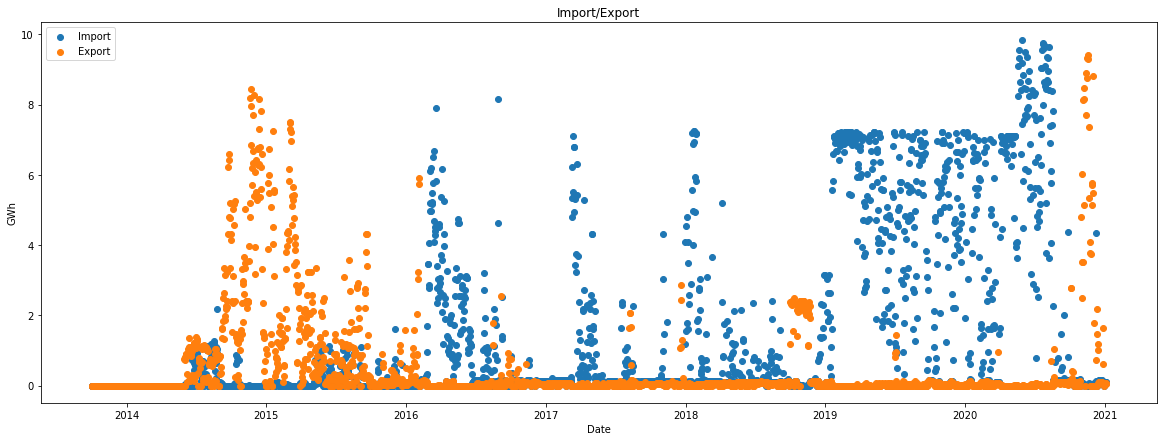

In [87]:
plt.figure(figsize=(20,7))
plt.title("Import/Export")
plt.scatter(power_system_data['date'], power_system_data['importacion__real'], label='Import')
plt.scatter(power_system_data['date'], power_system_data['exportacion__real'], label='Export') 
plt.xlabel('Date')
plt.ylabel('GWh')
plt.legend()
plt.show()

### Graphs between a time interval

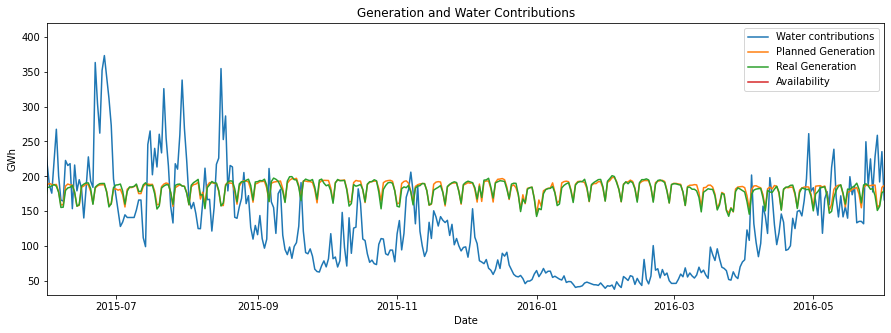

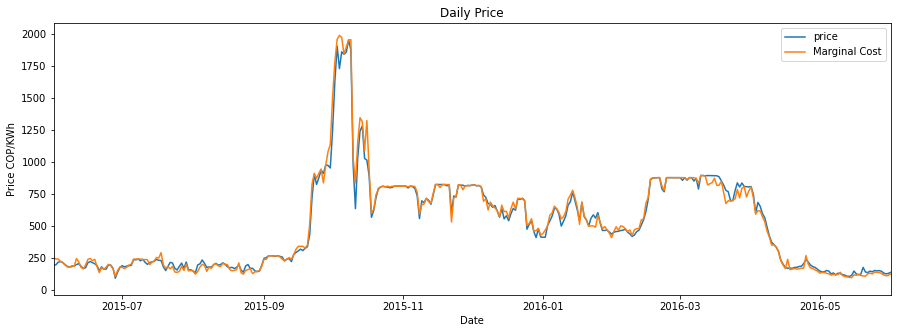

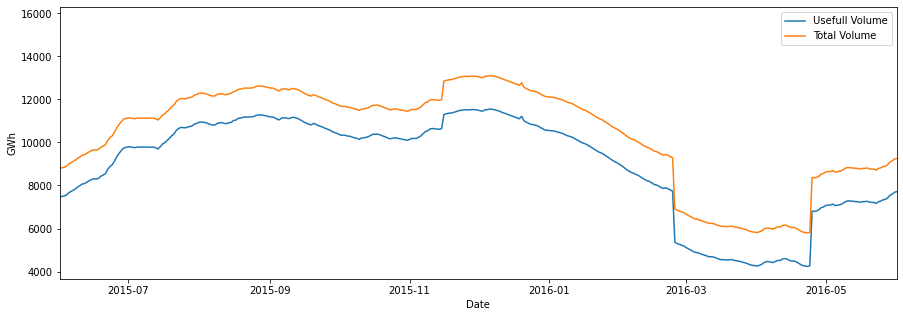

In [88]:
import datetime

time_interval = [datetime.date(2015, 6, 1), datetime.date(2016, 6, 1)]
plt.figure(figsize=(15,5))
plt.title("Generation and Water Contributions")
plt.plot(power_system_data['date'], power_system_data['aportes_hidricos'], label='Water contributions')
plt.plot(power_system_data['date'], power_system_data['generacion_total_programada_redespacho'], label='Planned Generation') 
plt.plot(power_system_data['date'], power_system_data['generacion_total_real'], label='Real Generation')
plt.plot(power_system_data['date'], power_system_data['disponibilidad_real']*24/1000, label='Availability')
plt.xlabel('Date')
plt.ylabel('GWh')
plt.xlim(time_interval)
plt.ylim(30,420)
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.title("Daily Price")
plt.plot(power_system_data['date'], power_system_data['precio_bolsa_tx1'], label='price')
plt.plot(power_system_data['date'], power_system_data['costo_marginal_promedio_redespacho'], label='Marginal Cost')
plt.xlabel('Date')
plt.ylabel('Price COP/KWh')
plt.xlim(time_interval)
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.title("")
plt.plot(power_system_data['date'], power_system_data['volumen_util_diario'], label='Usefull Volume')
plt.plot(power_system_data['date'], power_system_data['volumen'], label='Total Volume')
plt.xlabel('Date')
plt.ylabel('GWh')
plt.xlim(time_interval)
plt.legend()
plt.show()

In [89]:
power_system_data.head(2)

,date,precio_bolsa_tx1,generacion_total_programada_redespacho,generacion_total_programada_despacho,generacion_total_real,importacion_programada_redespacho,importacion__real,exportacion_programada_redespacho,exportacion__real,disponibilidad_real,demanda_no_atendida,costo_marginal_promedio_redespacho,aportes_hidricos,volumen_util_diario,volumen
0,2013-10-01,146.93,178.25,0.0,171.61,0.0,0.0,0.0,0.0,284.04768,0.30511,147.44,142.77,9520.17,10658.53
1,2013-10-02,147.73,180.02,0.0,175.39,0.0,0.0,0.0,0.0,283.22184,0.16789,160.80,134.89,9483.40,10621.76


In [90]:
power_system_data.drop(['generacion_total_programada_redespacho', \
                        'generacion_total_programada_despacho', \
                        'importacion_programada_redespacho', \
                        'importacion__real', \
                        'exportacion_programada_redespacho',\
                        'exportacion__real'], axis=1, inplace=True)

In [91]:
power_system_data.head(2)

,date,precio_bolsa_tx1,generacion_total_real,disponibilidad_real,demanda_no_atendida,costo_marginal_promedio_redespacho,aportes_hidricos,volumen_util_diario,volumen
0,2013-10-01,146.93,171.61,284.04768,0.30511,147.44,142.77,9520.17,10658.53
1,2013-10-02,147.73,175.39,283.22184,0.16789,160.80,134.89,9483.40,10621.76


In [92]:
corr_matrix = power_system_data.corr()
corr_matrix

,precio_bolsa_tx1,generacion_total_real,disponibilidad_real,demanda_no_atendida,costo_marginal_promedio_redespacho,aportes_hidricos,volumen_util_diario,volumen
precio_bolsa_tx1,1.000000,0.024172,-0.515631,-0.012716,0.984156,-0.376352,-0.342813,-0.344976
generacion_total_real,0.024172,1.000000,0.145223,-0.133476,0.008842,-0.016558,0.215968,0.231662
disponibilidad_real,-0.515631,0.145223,1.000000,-0.028728,-0.547615,0.188976,0.297483,0.338068
demanda_no_atendida,-0.012716,-0.133476,-0.028728,1.000000,-0.006035,0.070385,-0.020030,-0.023140
costo_marginal_promedio_redespacho,0.984156,0.008842,-0.547615,-0.006035,1.000000,-0.367349,-0.335336,-0.340864
aportes_hidricos,-0.376352,-0.016558,0.188976,0.070385,-0.367349,1.000000,0.226685,0.231709
volumen_util_diario,-0.342813,0.215968,0.297483,-0.020030,-0.335336,0.226685,1.000000,0.997535
volumen,-0.344976,0.231662,0.338068,-0.023140,-0.340864,0.231709,0.997535,1.000000


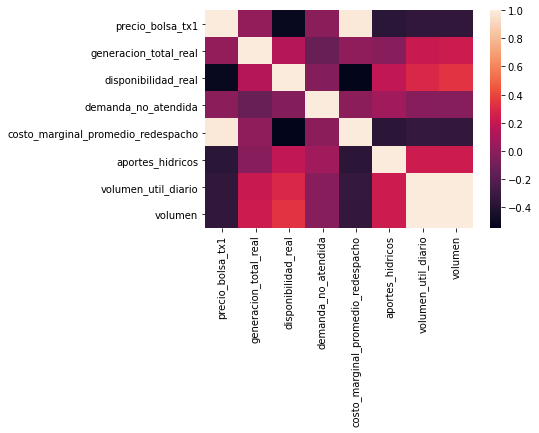

In [93]:
import seaborn as sns
sns.heatmap(corr_matrix)

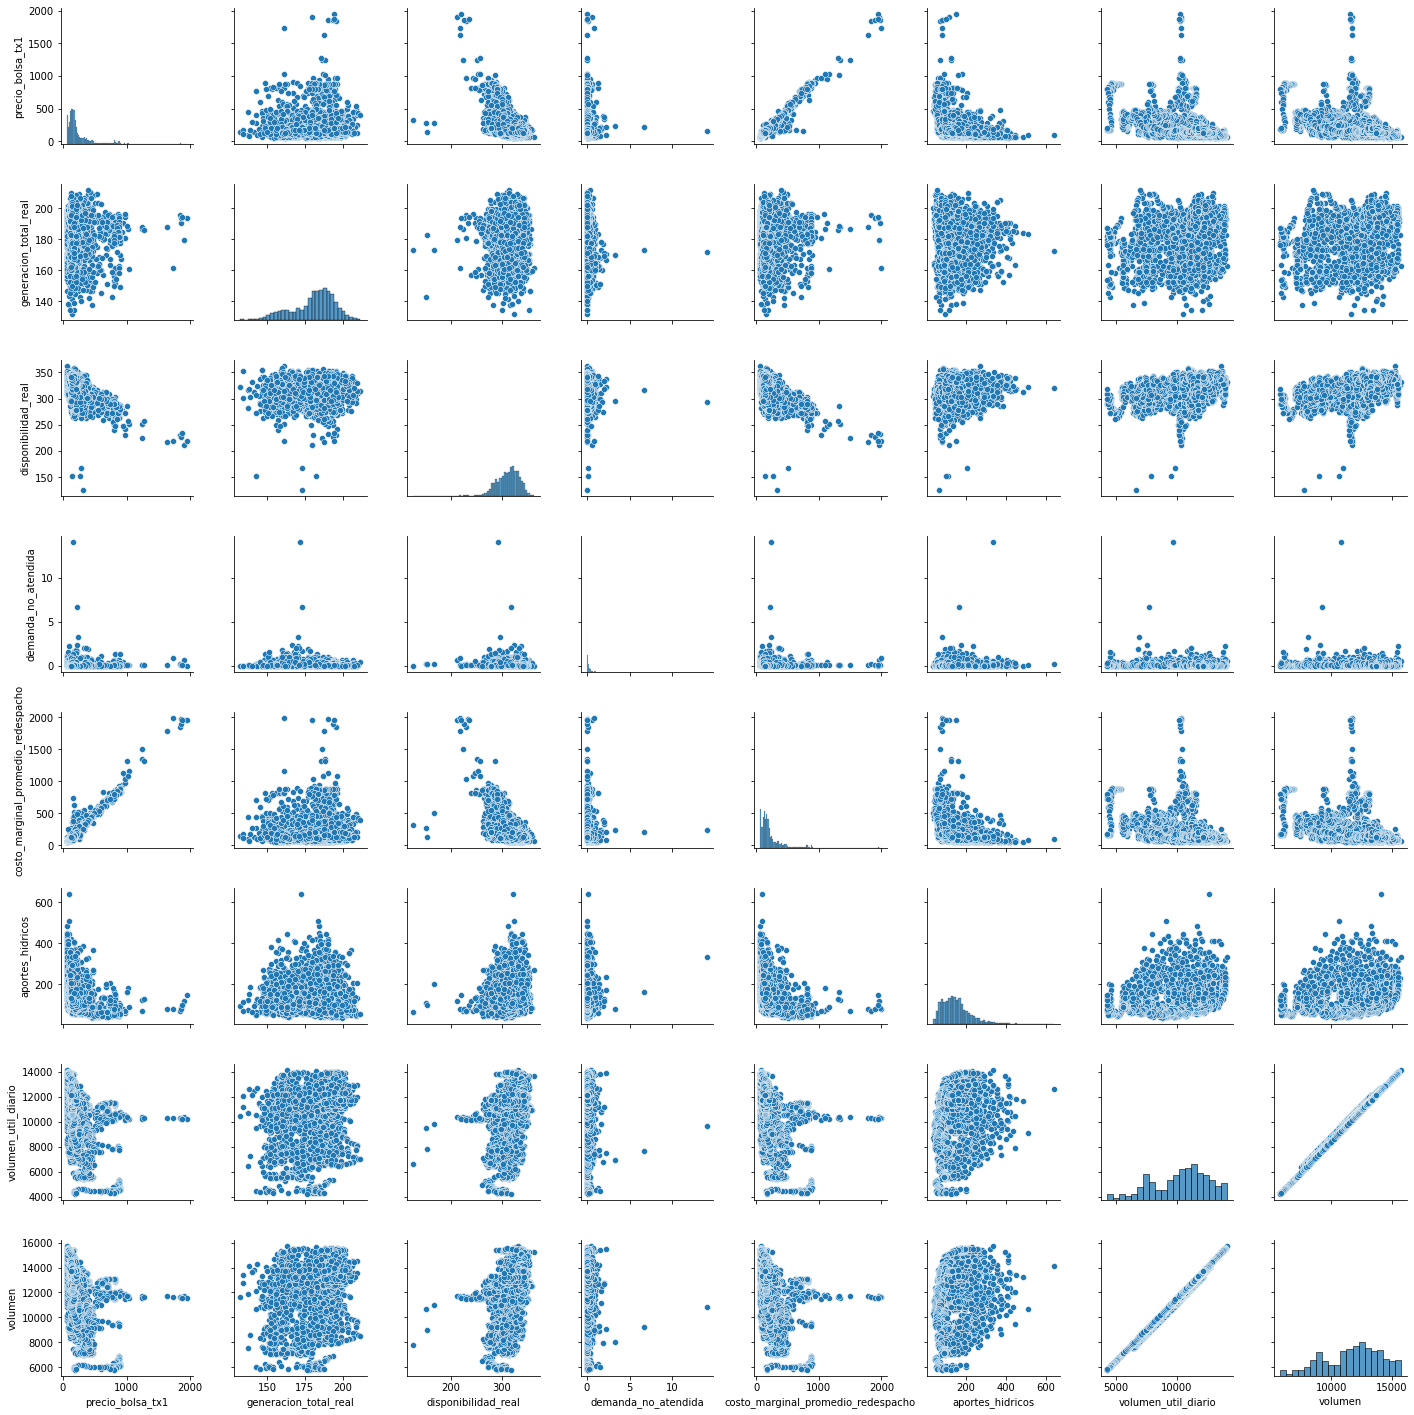

In [94]:
sns.pairplot(power_system_data)